In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

camp = pd.read_csv('/kaggle/input/analyze-the-marketing-spending/Marketing.csv')
print(camp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB
None


In [2]:
camp = camp.drop_duplicates()
camp["campaign_name"] = camp["campaign_name"].str.lower()
camp.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


**1. Key Metrics by Campaign**

In [3]:
# Key Metrics by Campaign
camp_met = camp.groupby('campaign_name').agg({
    'impressions': 'sum', 
    'clicks': 'sum', 
    'mark_spent': 'sum',
    'leads': 'sum', 
    'orders': 'sum',
    'revenue': 'sum',
})

camp_met['CTR (%)'] = (camp_met['clicks'] / camp_met['impressions'] * 100).round(2)
camp_met['CPC ($)'] = (camp_met['mark_spent'] / camp_met['clicks']).round(2)
camp_met['CPL ($)'] = (camp_met['mark_spent'] / camp_met['leads']).round(2)
camp_met['CAC ($)'] = (camp_met['mark_spent'] / camp_met['orders']).round(2)
camp_met['AOV ($)'] = (camp_met['revenue'] / camp_met['orders']).round(2)
camp_met['ROAS (%)'] = (camp_met['revenue'] / camp_met['mark_spent'] * 100).round(2)
camp_met['ROMI (%)'] = ((camp_met['revenue'] - camp_met['mark_spent']) / camp_met['mark_spent'] * 100).round(2)

cols = ['CTR (%)', 'CPC ($)', 'CPL ($)', 'CAC ($)', 'AOV ($)','ROAS (%)', 'ROMI (%)']
camp_met_sum = camp_met[cols]
camp_met_sum

,CTR (%),CPC ($),CPL ($),CAC ($),AOV ($),ROAS (%),ROMI (%)
campaign_name,,,,,,,
banner_partner,0.04,11.97,495.29,3209.88,3929.09,122.41,22.41
facebook_lal,0.95,22.01,1383.94,8986.19,1021.20,11.36,-88.64
facebook_retargeting,3.07,8.90,526.61,2467.28,4971.47,201.50,101.50
facebook_tier1,0.38,10.69,725.54,5410.96,5055.72,93.43,-6.57
facebook_tier2,0.47,14.23,556.94,6822.49,5033.88,73.78,-26.22
google_hot,1.95,13.33,654.66,4270.46,7849.63,183.81,83.81
google_wide,0.35,9.42,428.59,4132.36,2740.98,66.33,-33.67
instagram_blogger,0.88,14.16,606.07,3861.24,5280.41,136.75,36.75
instagram_tier1,0.36,9.50,386.80,3384.27,5994.89,177.14,77.14


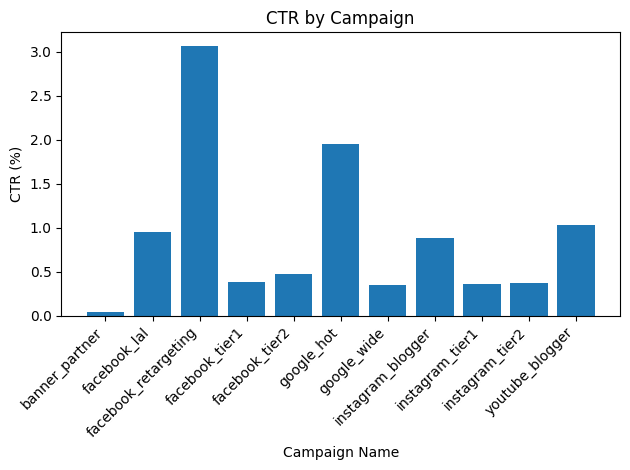

In [4]:
# CTR by Campaign
plt.figure()
plt.bar(camp_met_sum.index, camp_met_sum['CTR (%)'])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Campaign Name")
plt.ylabel("CTR (%)")
plt.title("CTR by Campaign")
plt.tight_layout()
plt.show()

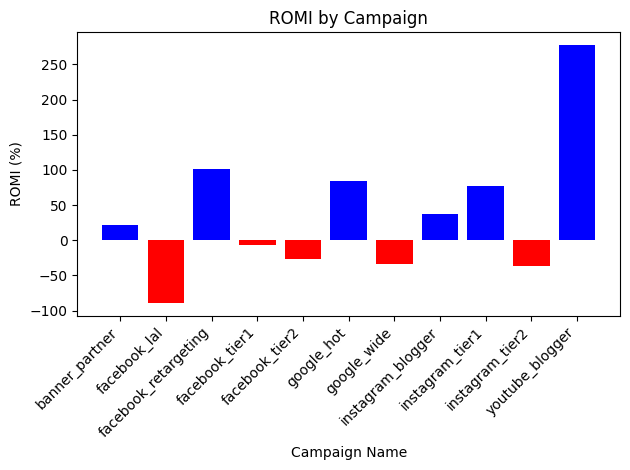

In [5]:
# ROMI by Campaign 
plt.figure()
plt.bar(camp_met_sum.index, camp_met_sum['ROMI (%)'], color = ['red' if value < 0 else 'blue' for value in camp_met_sum['ROMI (%)']])
plt.title("ROMI by Campaign")
plt.xlabel("Campaign Name")
plt.ylabel("ROMI (%)")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

YouTube_blogger seems to be the most profitable campaign, with the highest ROMI of 277.32%, as well as the highest AOV and lowest CAC. Facebook_retargeting was also an engaging campaign, with the highest CTR and a ROMI just above 100%. On the other hand, the Facebook_lal campaign had the worst performance, with the lowest AOV and -88.64% ROMI.

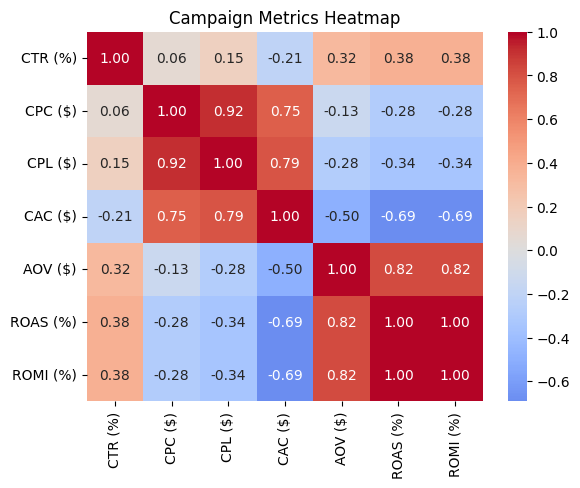

In [6]:
# Metrics Correlations
corr_matrix = camp_met_sum.corr()
corr_romi = corr_matrix['ROMI (%)']
corr_romi

plt.figure()
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap="coolwarm", center = 0)
plt.title("Campaign Metrics Heatmap")
plt.show()

**2. Key Metrics by Date**

In [7]:
date_met = camp.groupby('c_date').agg({
    'impressions': 'sum', 
    'clicks': 'sum', 
    'mark_spent': 'sum',
    'leads': 'sum', 
    'orders': 'sum',
    'revenue': 'sum',
})

date_met['CTR (%)'] = (date_met['clicks'] / date_met['impressions'] * 100).round(2)
date_met['CPC ($)'] = (date_met['mark_spent'] / date_met['clicks']).round(2)
date_met['CPL ($)'] = (date_met['mark_spent'] / date_met['leads']).round(2)
date_met['CAC ($)'] = (date_met['mark_spent'] / date_met['orders']).round(2)
date_met['AOV ($)'] = (date_met['revenue'] / date_met['orders']).round(2)
date_met['ROAS (%)'] = (date_met['revenue'] / date_met['mark_spent'] * 100).round(2)
date_met['ROMI (%)'] = ((date_met['revenue'] - date_met['mark_spent']) / date_met['mark_spent'] * 100).round(2)

cols = ['CTR (%)', 'CPC ($)', 'CPL ($)', 'CAC ($)', 'AOV ($)','ROAS (%)', 'ROMI (%)']
date_met_sum = date_met[cols]
date_met_sum

,CTR (%),CPC ($),CPL ($),CAC ($),AOV ($),ROAS (%),ROMI (%)
c_date,,,,,,,
2021-02-01,0.07,8.06,362.90,4028.16,6089.20,151.17,51.17
2021-02-02,0.06,6.31,489.81,3501.20,5858.69,167.33,67.33
2021-02-03,0.06,10.26,404.39,3380.25,5799.05,171.56,71.56
2021-02-04,0.20,9.74,488.23,3720.82,5203.50,139.85,39.85
2021-02-05,0.35,12.56,498.15,3966.29,5694.15,143.56,43.56
2021-02-06,0.06,10.20,487.23,4079.78,5549.32,136.02,36.02
2021-02-07,0.32,10.22,380.64,3563.00,5054.03,141.85,41.85
2021-02-08,0.47,7.62,430.57,3803.39,5144.25,135.25,35.25
2021-02-09,0.37,10.47,489.42,3825.81,5340.52,139.59,39.59


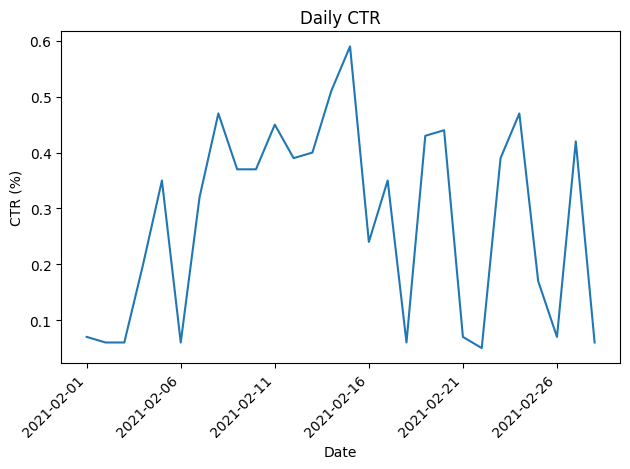

In [8]:
# CTR by date
date_met['CTR (%)'].plot(kind = 'line')
plt.title('Daily CTR')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

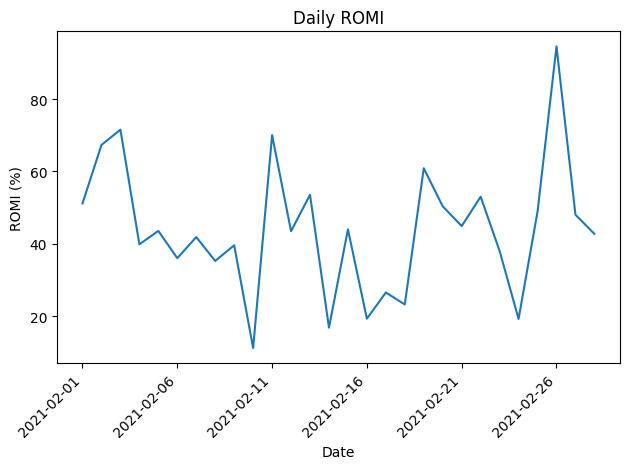

In [9]:
# ROMI by date
date_met['ROMI (%)'].plot(kind = 'line')
plt.title('Daily ROMI')
plt.xlabel('Date')
plt.ylabel('ROMI (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [10]:
# Daily Insight Generator for CTR and ROMI
ctr_avg = date_met_sum['CTR (%)'].mean()
romi_avg = date_met_sum['ROMI (%)'].mean()

date_met_sum['CTR_vs_avg (%)'] = (((date_met_sum['CTR (%)'] - ctr_avg)  / ctr_avg) * 100).round(2)
date_met_sum['ROMI_vs_avg (%)'] = (((date_met_sum['ROMI (%)'] - romi_avg)  / romi_avg) * 100).round(2)

date_met_sum['CTR_vs_prev (%)'] = (date_met_sum['CTR (%)'].pct_change() * 100).round(2)
date_met_sum['ROMI_vs_prev (%)'] = (date_met_sum['ROMI (%)'].pct_change() * 100).round(2)

cols = ['CTR_vs_avg (%)','ROMI_vs_avg (%)','CTR_vs_prev (%)', 'ROMI_vs_prev (%)']
date_met_comp = date_met_sum[cols]
date_met_comp

,CTR_vs_avg (%),ROMI_vs_avg (%),CTR_vs_prev (%),ROMI_vs_prev (%)
c_date,,,,
2021-02-01,-75.16,16.03,NaN,NaN
2021-02-02,-78.71,52.67,-14.29,31.58
2021-02-03,-78.71,62.26,0.00,6.28
2021-02-04,-29.02,-9.64,233.33,-44.31
2021-02-05,24.21,-1.23,75.00,9.31
2021-02-06,-78.71,-18.33,-82.86,-17.31
2021-02-07,13.56,-5.11,433.33,16.19
2021-02-08,66.79,-20.07,46.87,-15.77
2021-02-09,31.31,-10.23,-21.28,12.31


In [11]:
def daily_insight(date_str, date_met_comp):
    date_met_comp.index = pd.to_datetime(date_met_comp.index)

    date = pd.to_datetime(date_str)
    row = date_met_comp.loc[date]

    text = f"Daily Insight for {date_str}\n"
    
    if date not in date_met_comp.index:
        return f"{date_str} is not included in the campaign period."

    if pd.isna(row['CTR_vs_prev (%)']):
        text += "Day 1 of campaign"
    else:
        text += (
            f"* CTR {'increased' if row['CTR_vs_prev (%)'] > 0 else 'decreased'} "
            f"by {abs(row['CTR_vs_prev (%)']):.2f}% compared to yesterday.\n"
            f"* ROMI {'increased' if row['ROMI_vs_prev (%)'] > 0 else 'decreased'} "
            f"by {abs(row['ROMI_vs_prev (%)']):.2f}% compared to yesterday.\n"
            f"* CTR is {abs(row['CTR_vs_avg (%)']):.2f}% "
            f"{'above' if row['CTR_vs_avg (%)'] > 0 else 'below'} the average.\n"
            f"* ROMI is {abs(row['ROMI_vs_avg (%)']):.2f}% "
            f"{'above' if row['ROMI_vs_avg (%)'] > 0 else 'below'} the average.\n"
        )
    return text

In [12]:
print(daily_insight('2021-02-14', date_met_comp))

Daily Insight for 2021-02-14
* CTR increased by 27.50% compared to yesterday.
* ROMI decreased by 68.63% compared to yesterday.
* CTR is 80.99% above the average.
* ROMI is 61.91% below the average.

